# Introduction

The rapid advancement of medical imaging technologies has revolutionized diagnostics and treatment planning in healthcare. However, the increasing complexity and volume of medical images pose significant challenges in their analysis and interpretation. This project aims to address these challenges by exploring and comparing innovative approaches to medical image analysis.


The main objective of this project is to compare four models: two of them based on KDM (Kernel Density Matrices), one based on MLE (Maximum Likelihood Estimation) using KDM, and the final one based on a typical convolutional neural network (CNN). This comprehensive comparison will provide insights into the effectiveness of different methodologies in medical image analysis.
To ensure a thorough evaluation, each of the four models will be implemented and tested on four distinct datasets:

* 28 x 28 pixel RGB images
* 28 x 28 pixel grayscale images
* 64 x 64 pixel RGB images
* 64 x 64 pixel grayscale images

This diverse range of image sizes and color formats will allow us to assess the models' performance across different resolutions and color complexities, providing a more comprehensive understanding of their capabilities and limitations.

Kernel Density Matrices (KDM) represent a novel approach in the field, offering potential advantages in capturing complex spatial relationships within medical images. By incorporating two KDM-based models, we aim to explore the versatility and robustness of this method. The inclusion of an MLE model using KDM further extends our investigation into probabilistic approaches to image analysis.


Convolutional neural networks have become a standard in image processing tasks, including medical applications. By comparing a CNN model with the KDM-based approaches, we seek to benchmark the performance of these novel methods against an established technique.


This project's findings will contribute to the growing body of knowledge in medical image analysis, potentially offering new tools and insights for healthcare professionals. The comparative analysis across different image types and sizes will shed light on the strengths and limitations of each approach, paving the way for more accurate and efficient diagnostic processes in the medical field.


# Data

The data used in this project is obtained from [MedMNIST](https://medmnist.com) and [MedMNIST+](https://github.com/MedMNIST/MedMNIST/blob/main/on_medmnist_plus.md). We use the PathMNIST dataset concerning colon pathologies.


The datasets consist of images of size 28x28 for MedMNIST and of sizes 64x64 and 128x128 for MedMNIST+. Our models will be evaluated with these three datasets.

The task will concern multiclass clasification (9 classes).

# Theoric aproach

The theoric aproach of this project can be obteined in the following link: https://arxiv.org/abs/2305.18204

# Implementation

We start by importing our dataset (MedMNIST)

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_c

In [ ]:
!pip install git+https://github.com/fagonzalezo/kdm.git

  Cloning https://github.com/fagonzalezo/kdm.git to /tmp/pip-req-build-lml017z5
  Running command git clone --filter=blob:none --quiet https://github.com/fagonzalezo/kdm.git /tmp/pip-req-build-lml017z5
  Resolved https://github.com/fagonzalezo/kdm.git to commit bdfb6fff55f7c7b1b2587c71853a94e1012f20fb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for kdm: filename=kdm-1.0.0-py3-none-any.whl size=25635 sha256=2fc2476cbf4000716e5dd5139d71b0775c756d51c0edf00a2f47a0485fb5a026
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5wvbmmh/wheels/48/eb/75/c3e2f0c44ed9a33eaf33dd83d4ca799c47d00f0f1cf802297e
Successfully built kdm


In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 26.8 MB/s eta 0:00:00


We follow by importing the kdm library, crusial for our work:

In [ ]:
from medmnist import PathMNIST
train_dataset = PathMNIST(split="train", download= "True")
validation_dataset = PathMNIST(split= "val", download= "True")
test_dataset = PathMNIST(split="test", download= "True")

100%|██████████| 205615438/205615438 [00:10<00:00, 19762464.48it/s]


Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import faiss
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
from keras import losses
from keras import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
import numpy as np

import kdm
from kdm.models import KDMClassModel
from kdm.models import KDMJointDenEstModel
from kdm.models.mem import MemKDMClassModelWrapper



import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
earlystop = EarlyStopping(monitor='sparse_categorical_accuracy', patience=5,
                           mode='max', verbose=1, restore_best_weights=True)

## Functions

We will create varios usefull functions that will be used in an intensive way along our project:

### Show Images

Inputs:

* A data_set
* A number of images to print.

Output:

* Grid with the number of images to print.

In [ ]:
def show_images(dataset, num_images):
    images = dataset.imgs
    labels = dataset.labels

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Class: {labels[i][0]}")
        plt.axis("off")
    plt.show()

In [ ]:
def show_imagesg(dataset, num_images):

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(X_train_gray[i], cmap='gray')
        plt.title(f"Class: {y_train[i][0]}")
        plt.axis("off")
    plt.show()


### Shalow model

Inputs:
* Training and validation data sets
* Encoded size: Integer, size that will be used on the encoder
* Dimensión of the output space: Integer
* Number of components: Integer, number of components of the KDM model
* EarlyStoping: Boolean, true if we want the model to early stop on the training
* Epochs: Integer, Number of epochs on training
* batch_size: Integer, Size of the bach that will be used on training

Outputs:

* Shallow KDM model trainned used the data and parameters from the inputs and history


In [ ]:
def shallow_model(X_train, y_train, X_val, y_val, encoded_size, dim_y, n_comp, earlystop, epochs, batch_size):

  #Normalice images:
  X_train = X_train / 255.0
  X_val = X_val / 255.0

  #Outputs to one dimention
  y_train = y_train.squeeze()
  y_val = y_val.squeeze()

  #flatten the images:
  X_train_flat = X_train.reshape((X_train.shape[0], -1))
  X_val_flat = X_val.reshape((X_val.shape[0], -1))

  #Model:
  encoder = keras.layers.Lambda(lambda x: x)

  kdm_model = KDMClassModel(encoded_size=encoded_size,
                            dim_y=dim_y,
                            encoder=encoder,
                            n_comp=n_comp,
                            sigma=0.1)

  #Porcces of training
  kdm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-3),
                  loss=keras.losses.sparse_categorical_crossentropy,
                  metrics=[keras.metrics.sparse_categorical_accuracy])

  #Initialice components
  # earlystop = EarlyStopping(monitor='sparse_categorical_accuracy', patience=5,
  #                          mode='max', verbose=1, restore_best_weights=True)
  idx = np.random.randint(X_train_flat.shape[0], size=n_comp)
  kdm_model.init_components(X_train_flat[idx],
                          np.eye(dim_y)[y_train[idx]],
                          init_sigma=True)

  #Training
  if earlystop:
    history = kdm_model.fit(X_train_flat, y_train, epochs=50, batch_size=500, validation_data=(X_val_flat, y_val), callbacks= [earlystop])
  else:
    history = kdm_model.fit(X_train_flat, y_train, epochs=50, batch_size=500, validation_data=(X_val_flat, y_val))

  return kdm_model, history

### Encoder

Inputs:
* Input shape: Tupple, shape of the input
* Base_depth: Base deep used in the encoder
* Encoded_size: Dimension of the encoded data

Outputs:
* Encoder

In [ ]:
tfkl = keras.layers

def create_encoder(input_shape, base_depth, encoded_size):
    encoder = keras.Sequential([
        tfkl.InputLayer(shape=input_shape),
        tfkl.Lambda(lambda x: x - 0.5),
        tfkl.Conv2D(base_depth, 5, strides=1,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(base_depth, 5, strides=2,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(2 * base_depth, 5, strides=1,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(2 * base_depth, 5, strides=2,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(4 * encoded_size, 7, strides=1,
                    padding='valid', activation=keras.ops.leaky_relu),
        tfkl.Dense(encoded_size,
                activation=None),#, activity_regularizer=tf.keras.regularizers.l2(1e-3)),
        #tfkl.layers.LayerNormalization(),
        tfkl.Flatten(),
    ])
    return encoder

### Encoder and MLE model

Inputs:

* Training, validation and test data sets
* input_shape: Tupple, Input shape of the encoder
* base_depth: Integer, Base deep of the encoder
* Encoded_size: Integer, final size of the encoder
* warm_up: Integer, Number of samples used to warm up the encoder
* dim_y: Integer, dimension of the output space
* n_comp: Integer, number of components of the kdm model
* epochs: Integer, number of epochs in training
* bach size: Integer, bach size in training
* earlystoping: Boolean, true if we use early stoping
* num_samples: number of samples to be printed on visualization

Outputs: None

This function creates two models: A KDM model using a warmed up encoder, and a KDM model using MLE depending on the encoder of the previous KDM model

In [ ]:
def encoder_model_mle_model(X_train, y_train, X_val, y_val, X_test, y_test, input_shape, base_depth, encoded_size, warm_up, dim_y, n_comp, epochs, batch_size, earlystoping, num_samples):

  #encoder
  encoder = create_encoder(input_shape, base_depth, encoded_size)

  #Warm up
  encoder_wmp = keras.Sequential([encoder,
                                keras.layers.Dense(dim_y, activation='softmax')])
  encoder_wmp.predict(X_train[:warm_up])
  encoder_wmp.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                    loss=losses.sparse_categorical_crossentropy,
                    metrics=[metrics.sparse_categorical_accuracy])

  #Model
  kdm_model = KDMClassModel(encoded_size=encoded_size,
                          dim_y=dim_y,
                          encoder=encoder,
                          n_comp=n_comp,
                          sigma=0.1)

  #components initialization
  idx = np.random.randint(X_train.shape[0], size=n_comp)
  y_train_one_hot = keras.utils.to_categorical(y_train[idx], num_classes=dim_y)
  kdm_model.init_components(X_train[idx], y_train_one_hot,
                          init_sigma=True, sigma_mult=10)

  print(f'Initial Sigma:\n {kdm_model.kernel.sigma.numpy()}')
  print("Training process:\n")


  #Compile and training
  kdm_model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                    loss=losses.sparse_categorical_crossentropy,
                    metrics=[metrics.sparse_categorical_accuracy])

  if earlystoping:
    history= kdm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[earlystop])
  else:
    history= kdm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)

  print(f'Final Sigma:\n {kdm_model.kernel.sigma.numpy()}')

  encoded_samples = keras.ops.convert_to_numpy(encoder.predict(X_train[:num_samples]))
  # Visualize the points in the feature space
  plt.scatter(encoded_samples[:, 0], encoded_samples[:, 1], alpha=0.5, c=y_train[:num_samples], cmap=plt.cm.coolwarm)


  prototypes = keras.ops.convert_to_numpy(kdm_model.kdm.c_x)
  # plot the prototypes
  plt.scatter(prototypes[:, 0], prototypes[:, 1], c='k', marker='X', s=50)
  plt.show()


  #Evaluate
  score = kdm_model.evaluate(X_test, y_test, verbose=0)
  print('Test loss:\n', score[0])
  print('Test accuracy:\n', score[1])
  score = kdm_model.evaluate(X_train, y_train, verbose=0)
  print('Train loss:\n', score[0])
  print('Train accuracy:\n', score[1])
  print(f'Sigma:\n {kdm_model.kernel.sigma.numpy()}')

  plt.title('model accuracy\n')
  plt.plot(history.history["sparse_categorical_accuracy"])
  plt.show()
  plt.title('model loss\n')
  plt.plot(history.history['loss'])
  plt.show()


  #MLE model:

  # join X and y using a one-hot encoding for y
  X_encoded = keras.ops.convert_to_numpy(encoder.predict(X_train))
  Xy_train = np.concatenate((X_encoded,
                          np.squeeze(np.eye(9)[y_train])),
                          axis=1)

  dim_x = encoded_size
  sigma = kdm_model.kernel.sigma.numpy()
  kdm_mle_mnist = KDMJointDenEstModel(dim_x=dim_x, dim_y=dim_y, sigma=sigma, n_comp=n_comp)

  optimizer = optimizers.Adam(learning_rate=1e-3)

  # kqmd_model2.predict(Xy_train[:1]) # initialize the model
  idx = np.random.randint(Xy_train.shape[0], size=n_comp)
  kdm_mle_mnist.init_components(Xy_train[idx], sigma=sigma)

  # Plot initial prototypes
  centroids = kdm_mle_mnist.kdmproj.c_x.numpy()
  fig = plt.figure(figsize=(4, 3))
  plt.scatter(Xy_train[:, 0], Xy_train[:, 1], alpha=0.5)
  plt.scatter(centroids[:, 0], centroids[:, 1], marker='o')
  plt.show()

  kdm_mle_mnist.compile(optimizer=optimizer)

  print(f'Initial Sigma:\n {kdm_mle_mnist.kernel_x.sigma.numpy()}')
  print("Training process:\n")

  kdm_mle_mnist.fit(Xy_train, epochs=50, verbose=2, batch_size=200,callbacks=[earlystop])

  print(f'Final Sigma:\n {kdm_mle_mnist.kernel_x.sigma.numpy()}')

  kdm_mnist2 = KDMClassModel(encoded_size=encoded_size,
                            dim_y=dim_y,
                            encoder=encoder,
                            n_comp=n_comp,
                            sigma=0.1)

  kdm_mnist2.kdm.c_x.assign(kdm_mle_mnist.kdmproj.c_x[:, 0:encoded_size])
  kdm_mnist2.kdm.c_y.assign(kdm_mle_mnist.kdmproj.c_x[:, encoded_size:])
  kdm_mnist2.kdm.c_w.assign(kdm_mle_mnist.kdmproj.c_w)
  kdm_mnist2.kernel.sigma.assign(kdm_mle_mnist.kernel_x.sigma)

  kdm_mnist2.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                    loss=losses.sparse_categorical_crossentropy,
                    metrics=[metrics.sparse_categorical_accuracy])

  score = kdm_mnist2.evaluate(X_test, y_test, verbose=0)
  print('Test loss:\n', score[0])
  print('Test accuracy:\n', score[1])
  score = kdm_mnist2.evaluate(X_train, y_train, verbose=0)
  print('Train loss:\n', score[0])
  print('Train accuracy:\n', score[1])
  print(f'Final Sigma: {kdm_mnist2.kernel.sigma.numpy()}')

  encoded_samples = keras.ops.convert_to_numpy(encoder.predict(X_train[:num_samples]))
  # Visualize the points in the feature space
  plt.scatter(encoded_samples[:, 0], encoded_samples[:, 1], alpha=0.5, c=y_train[:num_samples], cmap=plt.cm.coolwarm)

  prototypes = keras.ops.convert_to_numpy(kdm_mnist2.kdm.c_x)
  # plot the prototypes
  plt.scatter(prototypes[:, 0], prototypes[:, 1], c='k', marker='X', s=50)
  plt.show()

  return 0

### CNN

Inputs

* Train, validation and test images and labels
* Input Shape: tupple of the shape of the input

Outpts:
* None

The architecture of the CNN will be:

- Input layer
- Convolutional Layer, kernel 3 x 3, ReLu activation, 32 filters
- Max Pooling Layer, kernel 2 x 2
- Convolutional Layer, kernel 3 x 3, ReLu activation, 64 filters
- Max Pooling Layer, kernel 2 x 2
- Convolutional Layer, kernel 3x3, ReLu activation, 64 filters
- Falten Layer
- Dense layer with the same numbers of neurons as parameters of the previuos model
- output layer

In [ ]:
def cnn(train_images, train_labels, validation_images, validation_labels, test_images, test_labels, input_shape):

  model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(9, activation='softmax')
  ])

  model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(validation_images, validation_labels), callbacks = [earlystop])

  test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
  print(f'\nTest accuracy: {test_acc}')

  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.show()

  return 0

## Classification (28 x 28)

### Shallow KDM, 28 x 28

The first model that will be implemented is a shallow model, which means we only use and train one KDM layer to make classification:

Let's see some images of this dataset:

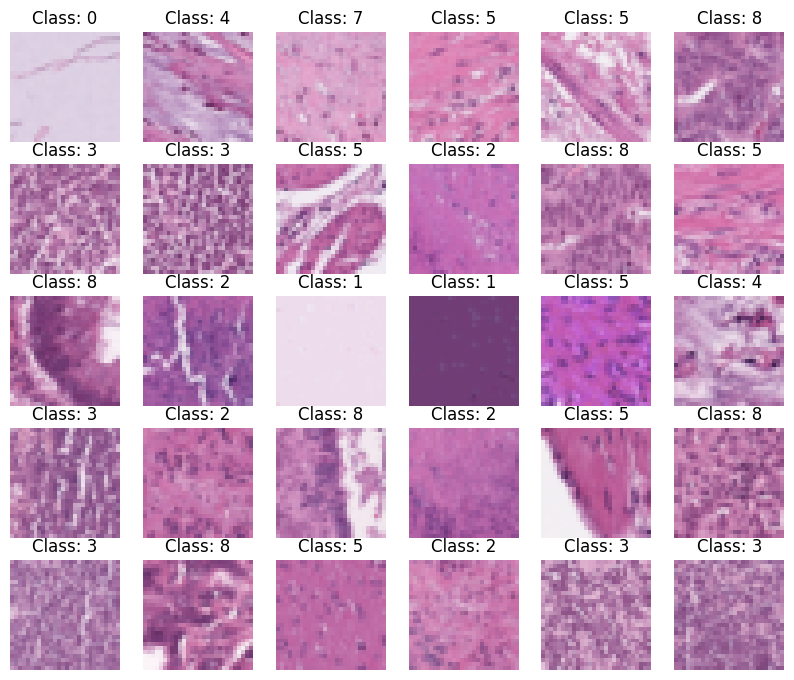

In [ ]:
show_images(train_dataset, 30)

Continue whit the process of preprocesing our data:

In [ ]:
#Define input and output

X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

X_test = X_test / 255.0
y_test = y_test.squeeze()
X_test_flat = X_test.reshape((X_test.shape[0], -1))

And we use our previous function:

In [ ]:
kdm_model, history = shallow_model(X_train, y_train, X_val, y_val, 28*28*3, 9, 500, True, 50, 500)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 1.7658 - sparse_categorical_accuracy: 0.3752 - val_loss: 1.5575 - val_sparse_categorical_accuracy: 0.4842
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5143 - sparse_categorical_accuracy: 0.4714 - val_loss: 1.4532 - val_sparse_categorical_accuracy: 0.5013
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4371 - sparse_categorical_accuracy: 0.5072 - val_loss: 1.4222 - val_sparse_categorical_accuracy: 0.5262
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4070 - sparse_categorical_accuracy: 0.5268 - val_loss: 1.3938 - val_sparse_categorical_accuracy: 0.5202
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3732 - sparse_categorical_accuracy: 0.5346 - val_loss: 1.3599 - val_sparse_categorical_accuracy: 0.5339
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3337 - sparse_categorical_accuracy: 0.5517 - val_loss: 1.3278 - val_sparse_categorical_accuracy: 0.5400
Ep

Evaluation of the model and visualization of accuary and loss curves

In [ ]:
test_loss, test_acc = kdm_model.evaluate(X_test_flat, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

225/225 - 4s - 17ms/step - loss: 1.3245 - sparse_categorical_accuracy: 0.5543
Test accuracy: 0.5543175339698792


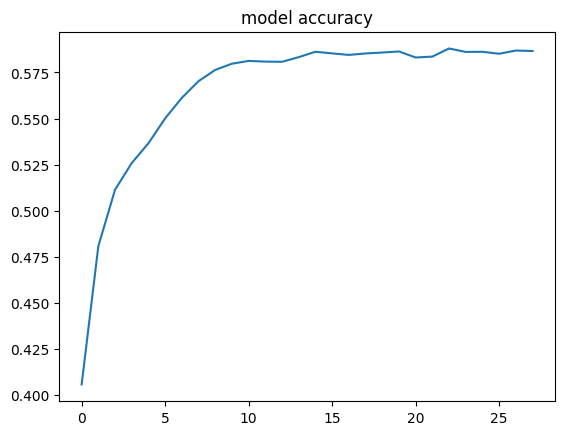

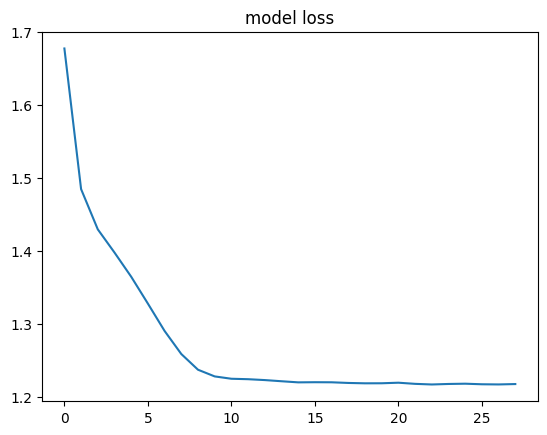

In [ ]:
plt.title('model accuracy')
plt.plot(history.history["sparse_categorical_accuracy"])
plt.show()
plt.title('model loss')
plt.plot(history.history['loss'])
plt.show()

### KDM + Encoder and MLE (28 x 28)

We will now work with a more robust model which follows the next architecture:

- An encoder which brings the image to a low latent space
- A KDM layer that uses inference

We start by defining the encoder. This will be the same as in the original implementation.

We obtain our data:

In [ ]:
X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

In [ ]:
X_train = X_train.astype(float) / 255.0
X_val = X_val.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (89996, 28, 28, 3)
X_val shape: (10004, 28, 28, 3)
X_test shape: (7180, 28, 28, 3)


And use our function

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Initial Sigma:
 0.0743706077337265
Training process:

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 1.9479 - sparse_categorical_accuracy: 0.2117 - val_loss: 1.4265 - val_sparse_categorical_accuracy: 0.3996
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.2201 - sparse_categorical_accuracy: 0.5227 - val_loss: 0.9305 - val_sparse_categorical_accuracy: 0.6506
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.8358 - sparse_categorical_accuracy: 0.6862 - val_loss: 0.7224 - val_sparse_categorical_accuracy: 0.7392
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6780 - sparse_categorical_accuracy: 0.7538 - val_loss: 0.6243 - val_sparse_categorical_accuracy: 0.7813
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6260 - sparse_categorical_accuracy: 0.7756 - val_loss: 0.5978 - val_sparse_categorical_accuracy: 0.7870
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5501 - spar

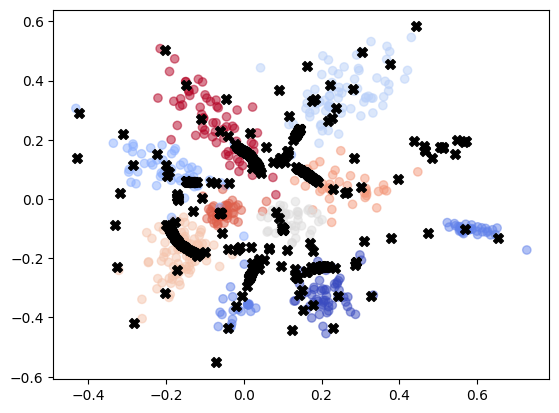

Test loss:
 0.8041572570800781
Test accuracy:
 0.8295264840126038
Train loss:
 0.07088015228509903
Train accuracy:
 0.9803102612495422
Sigma:
 0.05198515206575394


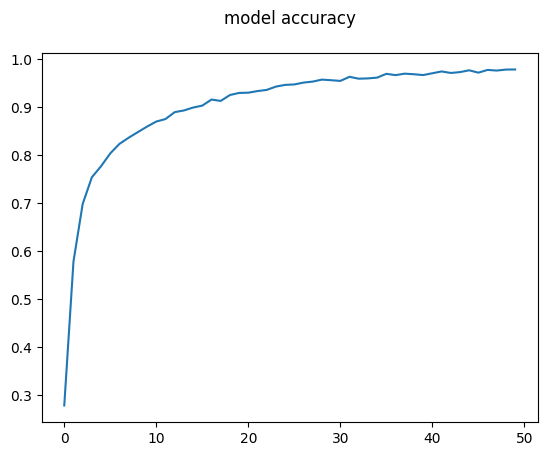

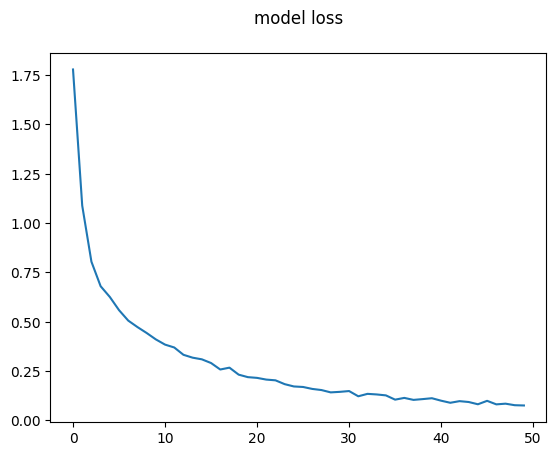

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


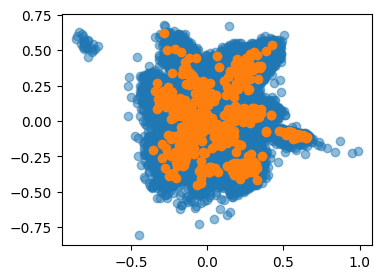

Initial Sigma:
 0.05198515206575394
Training process:

Epoch 1/50
450/450 - 4s - 8ms/step - loss: 3.1542
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `sparse_categorical_accuracy` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


450/450 - 1s - 1ms/step - loss: 3.1417
Epoch 3/50
450/450 - 1s - 1ms/step - loss: 3.1379
Epoch 4/50
450/450 - 1s - 1ms/step - loss: 3.1373
Epoch 5/50
450/450 - 1s - 1ms/step - loss: 3.1366
Epoch 6/50
450/450 - 1s - 1ms/step - loss: 3.1360
Epoch 7/50
450/450 - 1s - 1ms/step - loss: 3.1364
Epoch 8/50
450/450 - 1s - 1ms/step - loss: 3.1353
Epoch 9/50
450/450 - 1s - 1ms/step - loss: 3.1346
Epoch 10/50
450/450 - 1s - 1ms/step - loss: 3.1350
Epoch 11/50
450/450 - 1s - 1ms/step - loss: 3.1348
Epoch 12/50
450/450 - 1s - 1ms/step - loss: 3.1343
Epoch 13/50
450/450 - 1s - 1ms/step - loss: 3.1342
Epoch 14/50
450/450 - 1s - 1ms/step - loss: 3.1335
Epoch 15/50
450/450 - 1s - 1ms/step - loss: 3.1335
Epoch 16/50
450/450 - 1s - 1ms/step - loss: 3.1334
Epoch 17/50
450/450 - 1s - 1ms/step - loss: 3.1336
Epoch 18/50
450/450 - 1s - 1ms/step - loss: 3.1327
Epoch 19/50
450/450 - 1s - 1ms/step - loss: 3.1326
Epoch 20/50
450/450 - 1s - 1ms/step - loss: 3.1322
Epoch 21/50
450/450 - 1s - 1ms/step - loss: 3.1324

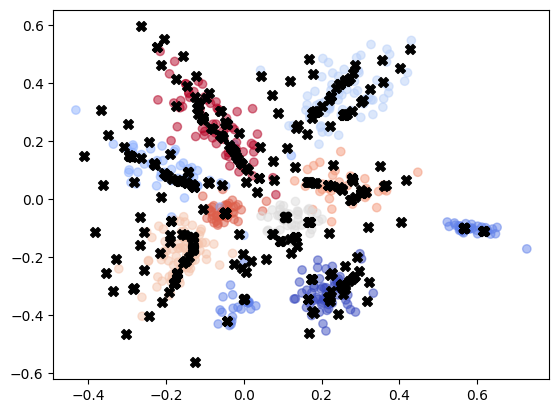

0

In [ ]:
encoder_model_mle_model(X_train, y_train, X_val, y_val,X_test, y_test, (28, 28, 3), 32, 2, 8900, 9, 500, 50, 500, False,500)

###CNN (28 x28)

We implement our first CNN network:

In [ ]:
train_dataset = PathMNIST(split="train", download= "True")
validation_dataset = PathMNIST(split= "val", download= "True")
test_dataset = PathMNIST(split="test", download= "True")


# Extraer imágenes y etiquetas del dataset
train_images = train_dataset.imgs
train_labels = train_dataset.labels

validation_images = validation_dataset.imgs
validation_labels = validation_dataset.labels

test_images = test_dataset.imgs
test_labels = test_dataset.labels

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz


In [ ]:
train_images = train_images.astype(np.float32) / 255.0
validation_images = validation_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4950 - loss: 1.3202 - val_accuracy: 0.6834 - val_loss: 0.8249
Epoch 2/50
  80/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6824 - loss: 0.8436

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `sparse_categorical_accuracy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7228 - loss: 0.7517 - val_accuracy: 0.7261 - val_loss: 0.7431
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7663 - loss: 0.6398 - val_accuracy: 0.7652 - val_loss: 0.6196
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7925 - loss: 0.5645 - val_accuracy: 0.8098 - val_loss: 0.5105
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8142 - loss: 0.5060 - val_accuracy: 0.8417 - val_loss: 0.4415
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8352 - loss: 0.4507 - val_accuracy: 0.8497 - val_loss: 0.4151
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8467 - loss: 0.4170 - val_accuracy: 0.8389 - val_loss: 0.4684
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8566 - loss: 0.3880 - val_accuracy: 0.8584 - val_loss: 0.3900
Epoch 9/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8702 - loss: 0.3600 - val_accurac

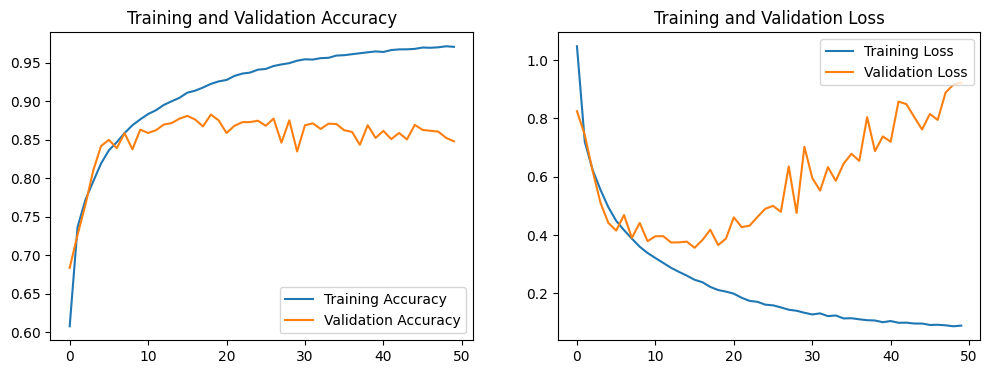

0

In [ ]:
cnn(train_images, train_labels, validation_images, validation_labels, test_images, test_labels, (28, 28, 3))

## Classification Gray (28 X 28)

### Shallow KDM Gray, 28 x 28

We will now implement the same algorithms but, instead of using RGB images, we will use Grayscale Images.

We will start with the first algorithm. First of all, we need to change the color of our images with the following code:

In [ ]:
# Load the datasets
train_dataset = PathMNIST(split="train", download=True)
validation_dataset = PathMNIST(split="val", download=True)
test_dataset = PathMNIST(split="test", download=True)

X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

def rgb_to_grayscale(images):
    # Convert RGB to grayscale using the formula:
    # Y = 0.299 R + 0.587 G + 0.114 B
    return np.dot(images[..., :3], [0.299, 0.587, 0.114])

# Convert each dataset to grayscale
X_train_gray = rgb_to_grayscale(X_train)
X_val_gray = rgb_to_grayscale(X_val)
X_test_gray = rgb_to_grayscale(X_test)

# Reshape the grayscale images to match the original shape (but with 1 channel)
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_val_gray = X_val_gray.reshape(X_val_gray.shape[0], X_val_gray.shape[1], X_val_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# Print shapes to verify
print("Grayscale train shape:", X_train_gray.shape)
print("Grayscale validation shape:", X_val_gray.shape)
print("Grayscale test shape:", X_test_gray.shape)

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Grayscale train shape: (89996, 28, 28, 1)
Grayscale validation shape: (10004, 28, 28, 1)
Grayscale test shape: (7180, 28, 28, 1)


We can see the new images:

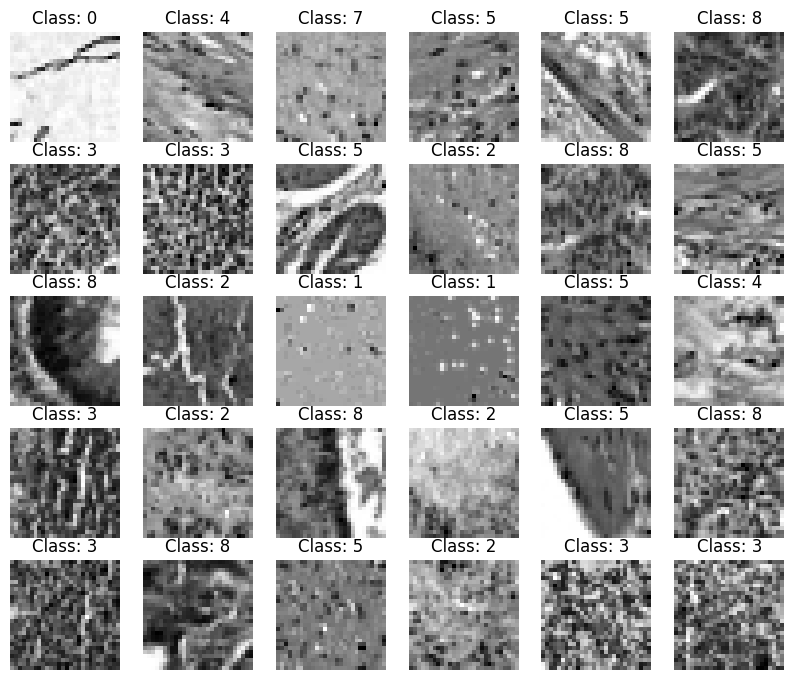

In [ ]:
show_imagesg(train_dataset, 30)

We make sure our test data is prepared:

In [ ]:
X_test = X_test_gray / 255.0
y_test_g = y_test.squeeze()
X_test_flat = X_test.reshape((X_test.shape[0], -1))

And implement our first model (Shallow model):

In [ ]:
kdm_model, history = shallow_model(X_train_gray, y_train, X_val_gray, y_val, 28*28*1, 9, 500, False, 50,500)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 1.8170 - sparse_categorical_accuracy: 0.3307 - val_loss: 1.7249 - val_sparse_categorical_accuracy: 0.3416
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7024 - sparse_categorical_accuracy: 0.3473 - val_loss: 1.6654 - val_sparse_categorical_accuracy: 0.3382
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6357 - sparse_categorical_accuracy: 0.3726 - val_loss: 1.6118 - val_sparse_categorical_accuracy: 0.3832
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5918 - sparse_categorical_accuracy: 0.3994 - val_loss: 1.5964 - val_sparse_categorical_accuracy: 0.3854
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5667 - sparse_categorical_accuracy: 0.4107 - val_loss: 1.5732 - val_sparse_categorical_accuracy: 0.4117
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5512 - sparse_categorical_accuracy: 0.4195 - val_loss: 1.5603 - val_sparse_categorical_accuracy: 0.4083
Epo

Evaluate it and visualize the curves of curves of accuary and loss:

In [ ]:
test_loss, test_acc = kdm_model.evaluate(X_test_flat, y_test_g, verbose=2)
print(f'Test accuracy: {test_acc}')

225/225 - 1s - 7ms/step - loss: 1.5871 - sparse_categorical_accuracy: 0.4373
Test accuracy: 0.4373258948326111


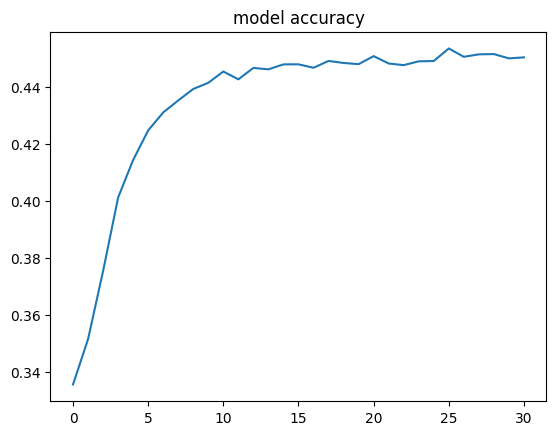

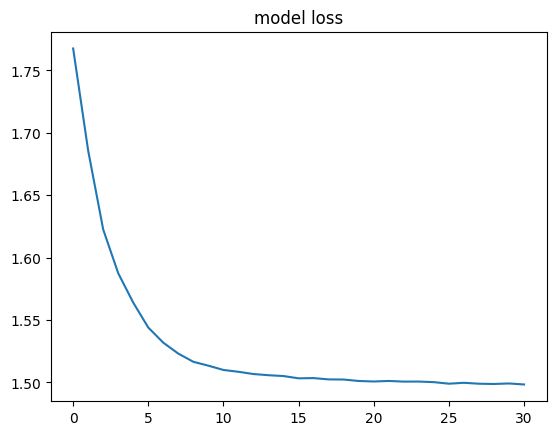

In [ ]:
plt.title('model accuracy')
plt.plot(history.history["sparse_categorical_accuracy"])
plt.show()
plt.title('model loss')
plt.plot(history.history['loss'])
plt.show()

### KDM + Encoder and MLE gray (28 x 28)

We now continue with the second model:

Data:

In [ ]:
# Load the datasets
train_dataset = PathMNIST(split="train", download=True)
validation_dataset = PathMNIST(split="val", download=True)
test_dataset = PathMNIST(split="test", download=True)

X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

def rgb_to_grayscale(images):
    # Convert RGB to grayscale using the formula:
    # Y = 0.299 R + 0.587 G + 0.114 B
    return np.dot(images[..., :3], [0.299, 0.587, 0.114])

# Convert each dataset to grayscale
X_train_gray = rgb_to_grayscale(X_train)
X_val_gray = rgb_to_grayscale(X_val)
X_test_gray = rgb_to_grayscale(X_test)

# Reshape the grayscale images to match the original shape (but with 1 channel)
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_val_gray = X_val_gray.reshape(X_val_gray.shape[0], X_val_gray.shape[1], X_val_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# Print shapes to verify
print("Grayscale train shape:", X_train_gray.shape)
print("Grayscale validation shape:", X_val_gray.shape)
print("Grayscale test shape:", X_test_gray.shape)

Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Using downloaded and verified file: /root/.medmnist/pathmnist.npz
Grayscale train shape: (89996, 28, 28, 1)
Grayscale validation shape: (10004, 28, 28, 1)
Grayscale test shape: (7180, 28, 28, 1)


In [ ]:
X_train_g = X_train_gray / 255.0
X_val_g = X_val_gray / 255.0
X_test_g = X_test_gray / 255.0

Make sure the dimention of our data is correct:

In [ ]:
print(f'X_train shape: {X_train_g.shape}')
print(f'X_val shape: {X_val_g.shape}')
print(f'X_test shape: {X_test_g.shape}')

X_train shape: (89996, 28, 28, 1)
X_val shape: (10004, 28, 28, 1)
X_test shape: (7180, 28, 28, 1)


And implement our function

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Initial Sigma:
 0.12449166178703308
Training process:

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 1.9317 - sparse_categorical_accuracy: 0.2364 - val_loss: 1.4784 - val_sparse_categorical_accuracy: 0.4077
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3200 - sparse_categorical_accuracy: 0.4818 - val_loss: 1.0079 - val_sparse_categorical_accuracy: 0.6041
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0176 - sparse_categorical_accuracy: 0.6098 - val_loss: 0.9199 - val_sparse_categorical_accuracy: 0.6460
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8989 - sparse_categorical_accuracy: 0.6580 - val_loss: 0.8524 - val_sparse_categorical_accuracy: 0.6732
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8114 - sparse_categorical_accuracy: 0.6882 - val_loss: 0.8310 - val_sparse_categorical_accuracy: 0.6843
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7636 - spa

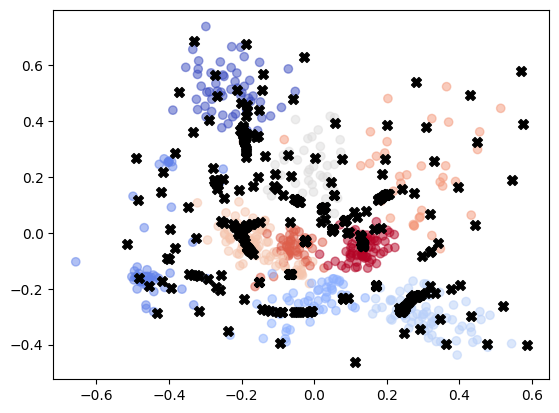

Test loss:
 1.2561848163604736
Test accuracy:
 0.7412256002426147
Train loss:
 0.12186665832996368
Train accuracy:
 0.960220456123352
Sigma:
 0.052298031747341156


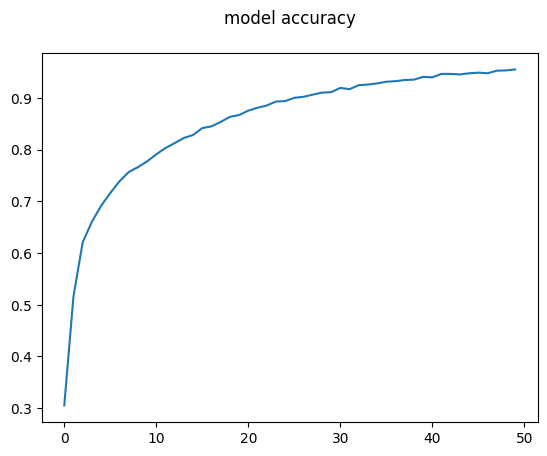

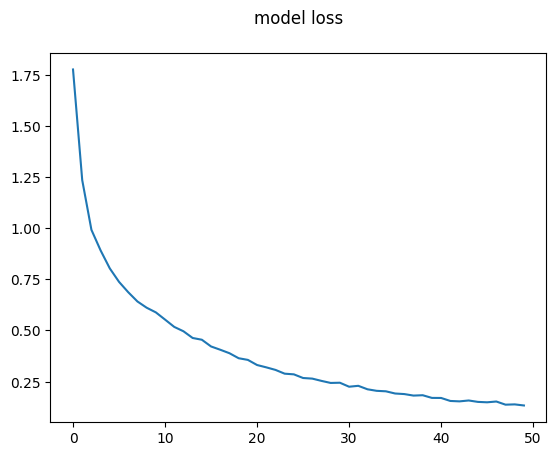

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


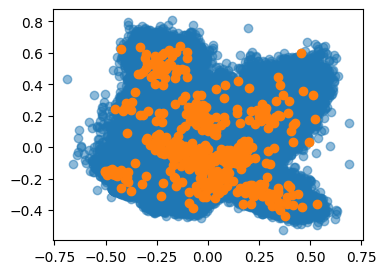

Initial Sigma:
 0.052298031747341156
Training process:

Epoch 1/50
450/450 - 6s - 13ms/step - loss: 3.3686
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `sparse_categorical_accuracy` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


450/450 - 0s - 1ms/step - loss: 3.3458
Epoch 3/50
450/450 - 0s - 1ms/step - loss: 3.3423
Epoch 4/50
450/450 - 1s - 1ms/step - loss: 3.3413
Epoch 5/50
450/450 - 1s - 1ms/step - loss: 3.3402
Epoch 6/50
450/450 - 0s - 1ms/step - loss: 3.3391
Epoch 7/50
450/450 - 1s - 1ms/step - loss: 3.3385
Epoch 8/50
450/450 - 0s - 1ms/step - loss: 3.3388
Epoch 9/50
450/450 - 1s - 1ms/step - loss: 3.3382
Epoch 10/50
450/450 - 1s - 1ms/step - loss: 3.3383
Epoch 11/50
450/450 - 1s - 1ms/step - loss: 3.3380
Epoch 12/50
450/450 - 0s - 1ms/step - loss: 3.3372
Epoch 13/50
450/450 - 1s - 1ms/step - loss: 3.3363
Epoch 14/50
450/450 - 0s - 1ms/step - loss: 3.3368
Epoch 15/50
450/450 - 0s - 1ms/step - loss: 3.3364
Epoch 16/50
450/450 - 0s - 1ms/step - loss: 3.3372
Epoch 17/50
450/450 - 0s - 1ms/step - loss: 3.3366
Epoch 18/50
450/450 - 0s - 1ms/step - loss: 3.3365
Epoch 19/50
450/450 - 0s - 1ms/step - loss: 3.3362
Epoch 20/50
450/450 - 0s - 1ms/step - loss: 3.3359
Epoch 21/50
450/450 - 0s - 1ms/step - loss: 3.3361

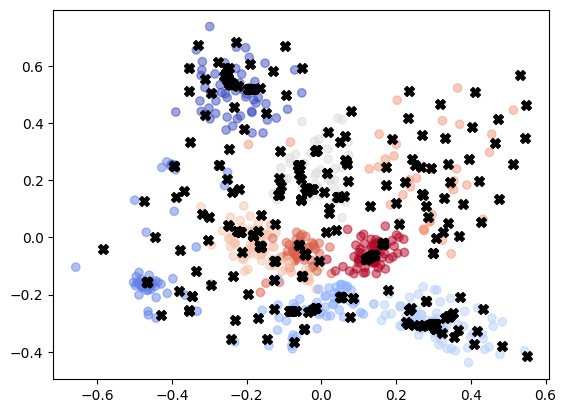

0

In [ ]:
encoder_model_mle_model(X_train_g, y_train, X_val_g, y_val, X_test_g, y_test, (28, 28, 1), 32, 2, 8900, 9, 500, 50, 500, False,500)

### CNN Gray (28 x 28)

Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4538 - loss: 1.4433 - val_accuracy: 0.6139 - val_loss: 0.9997
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6414 - loss: 0.9629 - val_accuracy: 0.6883 - val_loss: 0.8448
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6973 - loss: 0.8114 - val_accuracy: 0.7153 - val_loss: 0.7681
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7272 - loss: 0.7314 - val_accuracy: 0.7483 - val_loss: 0.6669
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7530 - loss: 0.6599 - val_accuracy: 0.7540 - val_loss: 0.6574
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7756 - loss: 0.6065 - val_accuracy: 0.7660 - val_loss: 0.6276
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7855 - loss: 0.5776 - val_accuracy: 0.7873 - val_loss: 0.5835
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8016 - loss: 0.5371 -

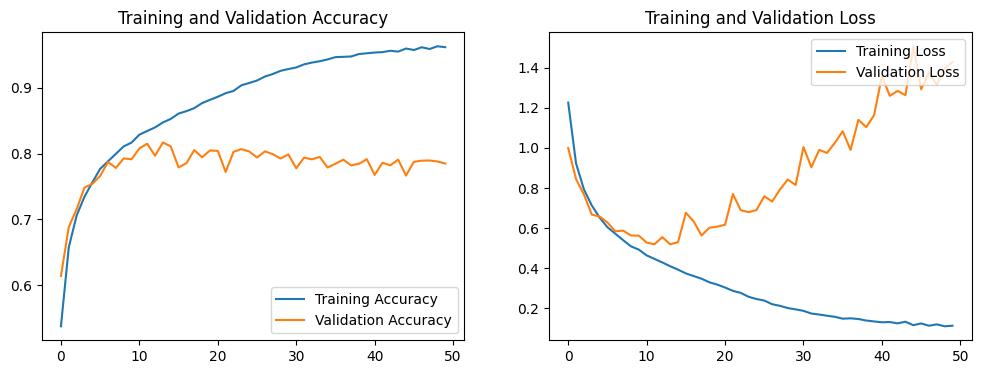

0

In [ ]:
cnn(X_train_g, y_train, X_val_g, y_val, X_test_g, y_test, (28, 28, 1))

## Classification (64 x 64)


### Shallow model 64 x 64

We will know proceed to implement the same algoritms on bigger images (64 x 64). We start implementing our shallow model not after seeing some of our new images:

In [ ]:
from medmnist import PathMNIST
train_datasetb = PathMNIST(split="train", download= "True", size= 64)
validation_datasetb = PathMNIST(split= "val", download= "True",size = 64)
test_datasetb = PathMNIST(split="test", download= "True", size = 64)

100%|██████████| 1069422170/1069422170 [00:55<00:00, 19231074.43it/s]


Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz


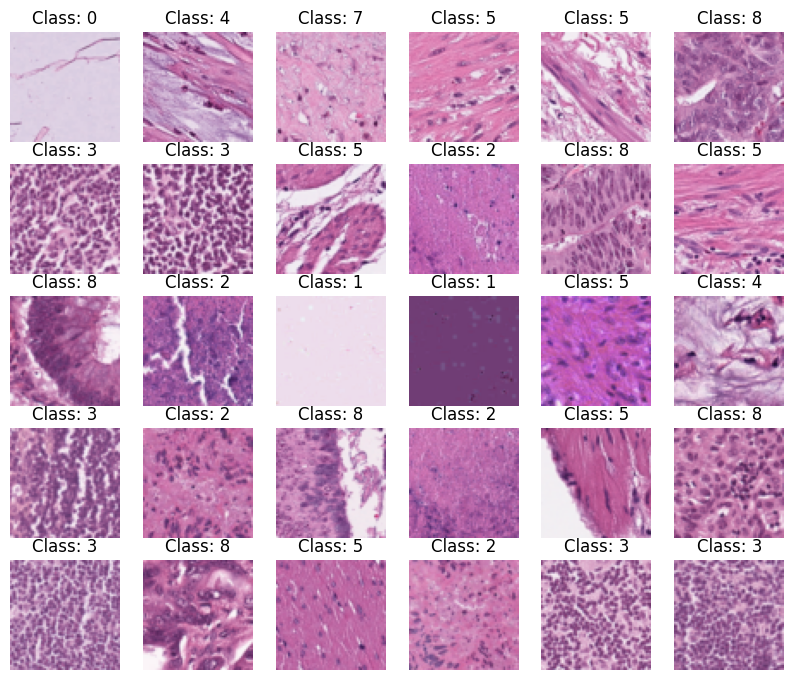

In [ ]:
show_images(train_datasetb, 30)

Define input and output

In [ ]:
X_trainb, y_trainb = train_datasetb.imgs, train_datasetb.labels
X_valb, y_valb = validation_datasetb.imgs, validation_datasetb.labels
X_testb, y_testb = test_datasetb.imgs, test_datasetb.labels

X_test = X_testb / 255.0
y_test = y_testb.squeeze()
X_test_flat = X_test.reshape((X_test.shape[0], -1))

Implementation of our model:

In [ ]:
kdm_model, history = shallow_model(X_trainb, y_trainb, X_valb, y_valb, 64*64*3, 9, 500, True, 50, 200)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - loss: 1.8694 - sparse_categorical_accuracy: 0.3514 - val_loss: 1.6982 - val_sparse_categorical_accuracy: 0.3798
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.6659 - sparse_categorical_accuracy: 0.4158 - val_loss: 1.6063 - val_sparse_categorical_accuracy: 0.4101
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5792 - sparse_categorical_accuracy: 0.4437 - val_loss: 1.5409 - val_sparse_categorical_accuracy: 0.4526
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5218 - sparse_categorical_accuracy: 0.4673 - val_loss: 1.5158 - val_sparse_categorical_accuracy: 0.5040
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.5019 - sparse_categorical_accuracy: 0.4868 - val_loss: 1.5012 - val_sparse_categorical_accuracy: 0.4954
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4917 - sparse_categorical_accuracy: 0.4861 - val_loss: 1.4917 - val_sparse_categorical_accuracy: 0.50

Evaluation and visualization

In [ ]:
test_loss, test_acc = kdm_model.evaluate(X_test_flat, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

225/225 - 4s - 18ms/step - loss: 1.2911 - sparse_categorical_accuracy: 0.5798
Test accuracy: 0.5798050165176392


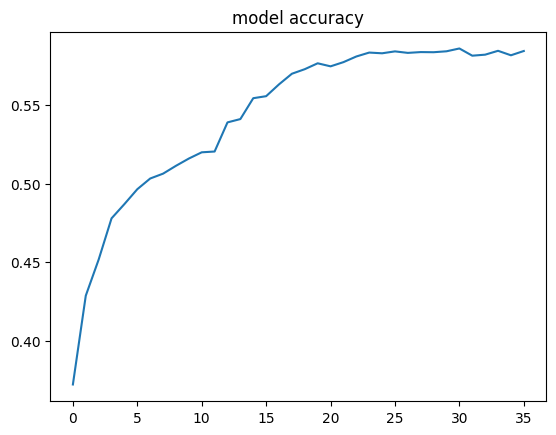

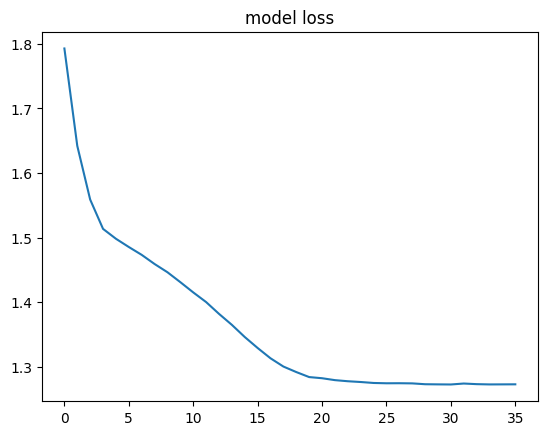

In [ ]:
plt.title('model accuracy')
plt.plot(history.history["sparse_categorical_accuracy"])
plt.show()
plt.title('model loss')
plt.plot(history.history['loss'])
plt.show()

### KLM + Encoder and MLE (64 x 64)

We obtain our data:

In [ ]:
from medmnist import PathMNIST
train_datasetb = PathMNIST(split="train", download= "True", size= 64)
validation_datasetb = PathMNIST(split= "val", download= "True",size = 64)
test_datasetb = PathMNIST(split="test", download= "True", size = 64)

X_trainb, y_trainb = train_datasetb.imgs, train_datasetb.labels
X_valb, y_valb = validation_datasetb.imgs, validation_datasetb.labels
X_testb, y_testb = test_datasetb.imgs, test_datasetb.labels

X_trainb = X_trainb / 255.0
X_valb = X_valb / 255.0
X_testb = X_testb / 255.0

Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz


And define a new encoder:

In [ ]:
tfkl = keras.layers

def create_encoder(input_shape, base_depth, encoded_size):
    encoder = keras.Sequential([
        tfkl.InputLayer(shape=input_shape),
        tfkl.Lambda(lambda x: x - 0.5),
        tfkl.Conv2D(base_depth, 5, strides=1,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(base_depth, 5, strides=2,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(2 * base_depth, 5, strides=1,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(2 * base_depth, 5, strides=2,
                    padding='same', activation=keras.ops.leaky_relu),
        tfkl.Conv2D(4 * encoded_size, 7, strides=1,
                    padding='valid', activation=keras.ops.leaky_relu),
        tfkl.Flatten(),
        tfkl.Dense(encoded_size,
                activation=None),#, activity_regularizer=tf.keras.regularizers.l2(1e-3)),
        #tfkl.layers.LayerNormalization(),
        # tfkl.Flatten(),

    ])
    return encoder

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Initial Sigma:
 0.29961857199668884
Training process:

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 185ms/step - loss: 2.0786 - sparse_categorical_accuracy: 0.1894 - val_loss: 2.1781 - val_sparse_categorical_accuracy: 0.2107
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 1.4055 - sparse_categorical_accuracy: 0.4431 - val_loss: 1.0954 - val_sparse_categorical_accuracy: 0.5622
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.9111 - sparse_categorical_accuracy: 0.6560 - val_loss: 0.7018 - val_sparse_categorical_accuracy: 0.7502
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.6711 - sparse_categorical_accuracy: 0.7597 - val_loss: 0.5856 - val_sparse_categorical_accuracy: 0.7940
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.5707 - sparse_categorical_accuracy: 0.7985 - val_loss: 0.4613 - val_sparse_categorical_accuracy: 0.8436
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0

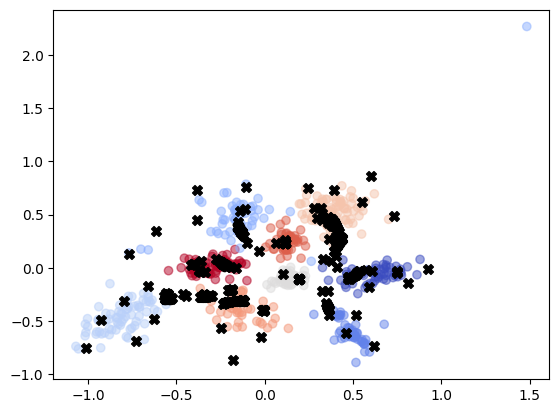

Test loss:
 0.6325142979621887
Test accuracy:
 0.8455431461334229
Train loss:
 0.04149925336241722
Train accuracy:
 0.9878772497177124
Sigma:
 0.11190059781074524


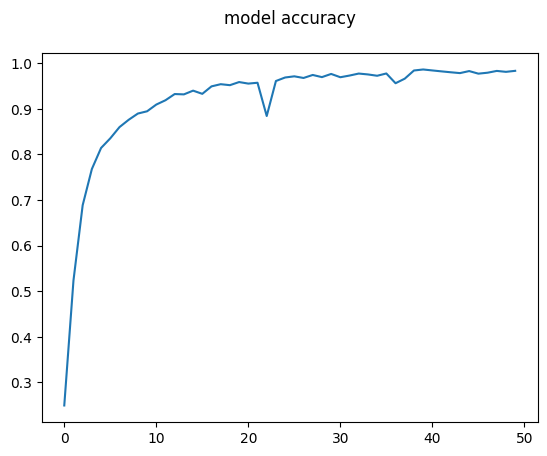

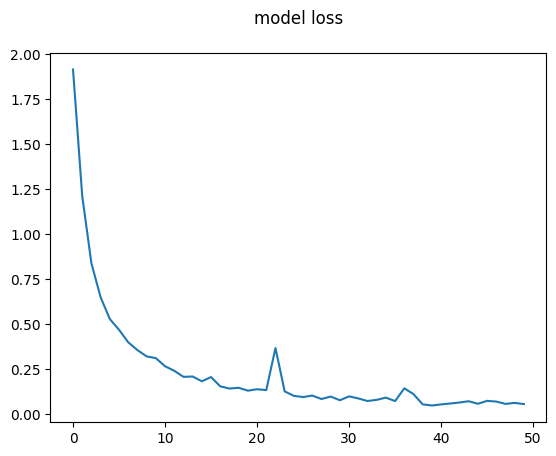

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


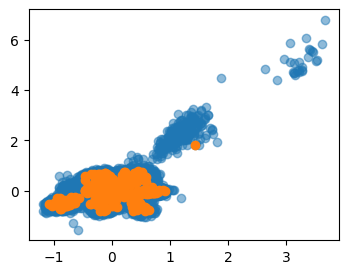

Initial Sigma:
 0.11190059781074524
Training process:

Epoch 1/50
450/450 - 6s - 12ms/step - loss: 4.1954
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `sparse_categorical_accuracy` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


450/450 - 0s - 1ms/step - loss: 4.1797
Epoch 3/50
450/450 - 0s - 1ms/step - loss: 4.1782
Epoch 4/50
450/450 - 0s - 1ms/step - loss: 4.1761
Epoch 5/50
450/450 - 0s - 1ms/step - loss: 4.1762
Epoch 6/50
450/450 - 0s - 1ms/step - loss: 4.1748
Epoch 7/50
450/450 - 0s - 1ms/step - loss: 4.1737
Epoch 8/50
450/450 - 1s - 1ms/step - loss: 4.1727
Epoch 9/50
450/450 - 0s - 1ms/step - loss: 4.1722
Epoch 10/50
450/450 - 0s - 1ms/step - loss: 4.1717
Epoch 11/50
450/450 - 0s - 1ms/step - loss: 4.1715
Epoch 12/50
450/450 - 0s - 1ms/step - loss: 4.1710
Epoch 13/50
450/450 - 0s - 1ms/step - loss: 4.1711
Epoch 14/50
450/450 - 0s - 1ms/step - loss: 4.1707
Epoch 15/50
450/450 - 0s - 1ms/step - loss: 4.1708
Epoch 16/50
450/450 - 0s - 1ms/step - loss: 4.1711
Epoch 17/50
450/450 - 0s - 1ms/step - loss: 4.1704
Epoch 18/50
450/450 - 0s - 1ms/step - loss: 4.1704
Epoch 19/50
450/450 - 0s - 1ms/step - loss: 4.1703
Epoch 20/50
450/450 - 0s - 1ms/step - loss: 4.1705
Epoch 21/50
450/450 - 0s - 1ms/step - loss: 4.1704

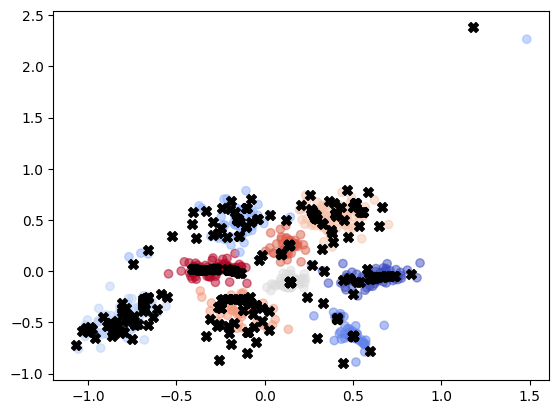

0

In [ ]:
encoder_model_mle_model(X_trainb, y_trainb, X_valb, y_valb, X_testb, y_testb, (64,64,3), 32, 2, 9000, 9, 500, 50, 500, False, 500)

### CNN (64 x 64)

We verify the dimentions of our data:

In [ ]:
# Verify the form of the images after adding the dimention chanel
print(f'Forma de train_images con canal: {X_trainb.shape}')
print(f'Forma de validation_images con canal: {X_valb.shape}')
print(f'Forma de test_images con canal: {X_testb.shape}')

Forma de train_images con canal: (89996, 64, 64, 3)
Forma de validation_images con canal: (10004, 64, 64, 3)
Forma de test_images con canal: (7180, 64, 64, 3)


And implement our function

Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.5381 - loss: 1.1970 - val_accuracy: 0.7768 - val_loss: 0.6144
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8091 - loss: 0.5195 - val_accuracy: 0.8687 - val_loss: 0.3719
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8681 - loss: 0.3718 - val_accuracy: 0.9065 - val_loss: 0.2720
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9050 - loss: 0.2683 - val_accuracy: 0.8474 - val_loss: 0.4441
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9233 - loss: 0.2194 - val_accuracy: 0.8929 - val_loss: 0.3198
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9400 - loss: 0.1649 - val_accuracy: 0.9052 - val_loss: 0.2936
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9570 - loss: 0.1236 - val_accuracy: 0.9175 - val_loss: 0.2755
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9674 - loss: 0.0949 -

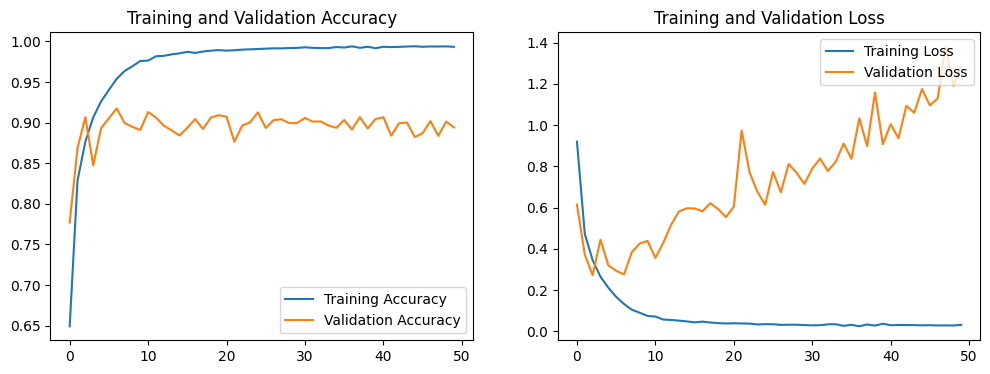

0

In [ ]:
cnn(X_trainb, y_trainb, X_valb, y_valb, X_testb, y_testb, (64, 64, 3))

## Classification Gray (64 x 64)

We will continue with the same procces as before, but using the images on a gray scale color.

### Shallow KDM Gray, 64 x 64



We load the dataset and turn the images to gray:

In [ ]:
# Load the datasets
train_dataset = PathMNIST(split="train", download=True, size = 64)
validation_dataset = PathMNIST(split="val", download=True, size = 64)
test_dataset = PathMNIST(split="test", download=True, size = 64)

X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

def rgb_to_grayscale(images):
    # Convert RGB to grayscale using the formula:
    # Y = 0.299 R + 0.587 G + 0.114 B
    return np.dot(images[..., :3], [0.299, 0.587, 0.114])

# Convert each dataset to grayscale
X_train_gray = rgb_to_grayscale(X_train)
X_val_gray = rgb_to_grayscale(X_val)
X_test_gray = rgb_to_grayscale(X_test)

# Reshape the grayscale images to match the original shape (but with 1 channel)
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_val_gray = X_val_gray.reshape(X_val_gray.shape[0], X_val_gray.shape[1], X_val_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# Print shapes to verify
print("Grayscale train shape:", X_train_gray.shape)
print("Grayscale validation shape:", X_val_gray.shape)
print("Grayscale test shape:", X_test_gray.shape)

Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Grayscale train shape: (89996, 64, 64, 1)
Grayscale validation shape: (10004, 64, 64, 1)
Grayscale test shape: (7180, 64, 64, 1)


We see some images:

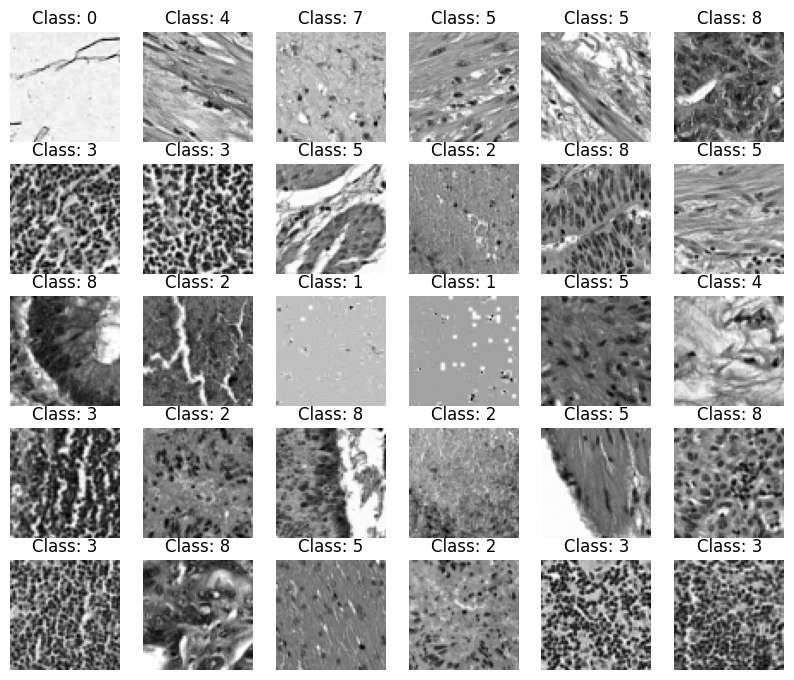

In [ ]:
show_imagesg(X_train_gray, 30)

Prepare our test data:

In [ ]:
X_test = X_test_gray / 255.0
y_test_g = y_test.squeeze()
X_test_flat = X_test.reshape((X_test.shape[0], -1))

Implement our model, evaluate it and visualied

In [ ]:
kdm_model, history = shallow_model(X_train_gray, y_train, X_val_gray, y_val, 64*64*1, 9, 500, False, 50,500)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - loss: 1.8800 - sparse_categorical_accuracy: 0.3274 - val_loss: 1.7750 - val_sparse_categorical_accuracy: 0.3236
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7592 - sparse_categorical_accuracy: 0.3381 - val_loss: 1.7448 - val_sparse_categorical_accuracy: 0.3289
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7276 - sparse_categorical_accuracy: 0.3416 - val_loss: 1.7263 - val_sparse_categorical_accuracy: 0.3243
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6928 - sparse_categorical_accuracy: 0.3540 - val_loss: 1.6887 - val_sparse_categorical_accuracy: 0.3413
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6691 - sparse_categorical_accuracy: 0.3671 - val_loss: 1.6829 - val_sparse_categorical_accuracy: 0.3411
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6520 - sparse_categorical_accuracy: 0.3738 - val_loss: 1.6610 - val_sparse_categorical_accuracy: 0.3570
Ep

In [ ]:
test_loss, test_acc = kdm_model.evaluate(X_test_flat, y_test_g, verbose=2)
print(f'Test accuracy: {test_acc}')

225/225 - 4s - 17ms/step - loss: 1.5098 - sparse_categorical_accuracy: 0.4465
Test accuracy: 0.44651809334754944


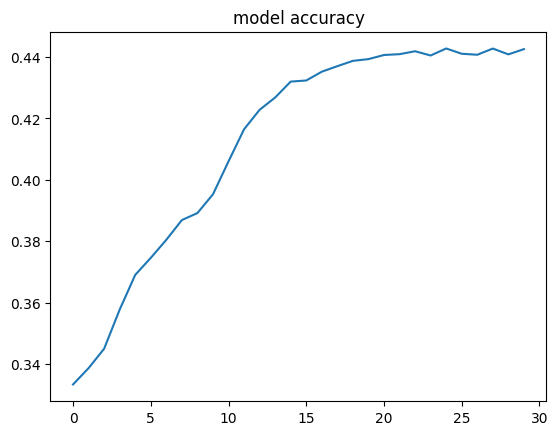

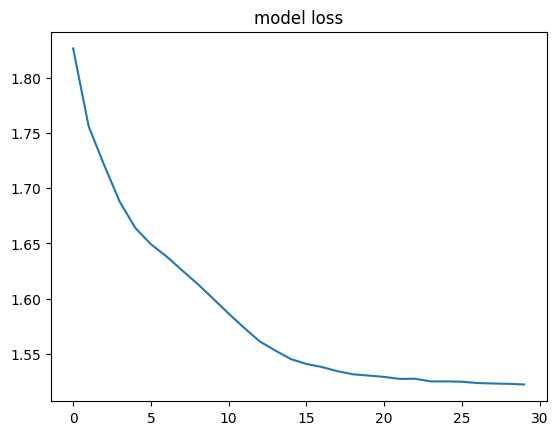

In [ ]:
plt.title('model accuracy')
plt.plot(history.history["sparse_categorical_accuracy"])
plt.show()
plt.title('model loss')
plt.plot(history.history['loss'])
plt.show()

### KDM + Encoder and MLE gray (64 x64)


We know continue with our robust model:

In [ ]:
# Load the datasets
train_dataset = PathMNIST(split="train", download=True, size = 64)
validation_dataset = PathMNIST(split="val", download=True, size = 64)
test_dataset = PathMNIST(split="test", download=True, size = 64)

X_train, y_train = train_dataset.imgs, train_dataset.labels
X_val, y_val = validation_dataset.imgs, validation_dataset.labels
X_test, y_test = test_dataset.imgs, test_dataset.labels

def rgb_to_grayscale(images):
    # Convert RGB to grayscale using the formula:
    # Y = 0.299 R + 0.587 G + 0.114 B
    return np.dot(images[..., :3], [0.299, 0.587, 0.114])

# Convert each dataset to grayscale
X_train_gray = rgb_to_grayscale(X_train)
X_val_gray = rgb_to_grayscale(X_val)
X_test_gray = rgb_to_grayscale(X_test)

# Reshape the grayscale images to match the original shape (but with 1 channel)
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], X_train_gray.shape[1], X_train_gray.shape[2], 1)
X_val_gray = X_val_gray.reshape(X_val_gray.shape[0], X_val_gray.shape[1], X_val_gray.shape[2], 1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], X_test_gray.shape[1], X_test_gray.shape[2], 1)

# Print shapes to verify
print("Grayscale train shape:", X_train_gray.shape)
print("Grayscale validation shape:", X_val_gray.shape)
print("Grayscale test shape:", X_test_gray.shape)

100%|██████████| 1069422170/1069422170 [02:06<00:00, 8423236.20it/s] 


Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Using downloaded and verified file: /root/.medmnist/pathmnist_64.npz
Grayscale train shape: (89996, 64, 64, 1)
Grayscale validation shape: (10004, 64, 64, 1)
Grayscale test shape: (7180, 64, 64, 1)


In [ ]:
x_train = X_train_gray / 255.0
x_val = X_val_gray / 255.0
x_test = X_test_gray / 255.0

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Initial Sigma:
 0.13138099014759064
Training process:

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - loss: 2.1398 - sparse_categorical_accuracy: 0.1565 - val_loss: 2.0639 - val_sparse_categorical_accuracy: 0.1726
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 1.7561 - sparse_categorical_accuracy: 0.3238 - val_loss: 1.2563 - val_sparse_categorical_accuracy: 0.5094
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 1.0924 - sparse_categorical_accuracy: 0.5903 - val_loss: 0.8900 - val_sparse_categorical_accuracy: 0.6638
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.8458 - sparse_categorical_accuracy: 0.6790 - val_loss: 0.7608 - val_sparse_categorical_accuracy: 0.7164
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.6856 - sparse_categorical_accuracy: 0.7364 - val_loss: 0.6293 - val_sparse_categorical_accuracy: 0.7559
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.

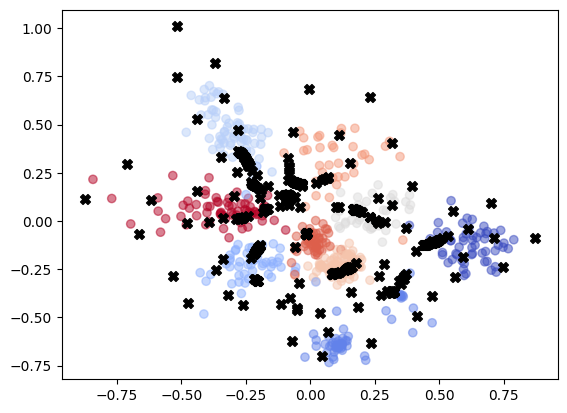

Test loss:
 1.151109218597412
Test accuracy:
 0.7402507066726685
Train loss:
 0.08265244215726852
Train accuracy:
 0.9750433564186096
Sigma:
 0.07165242731571198


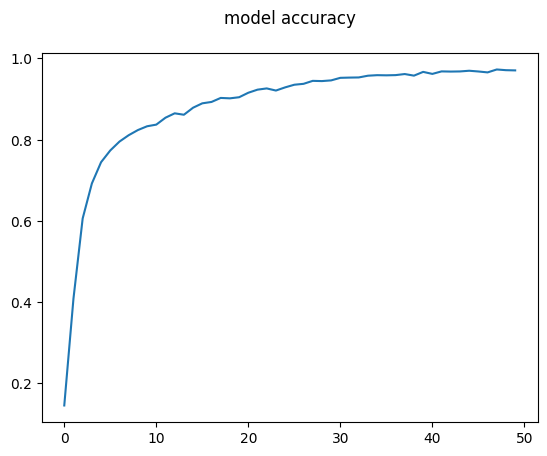

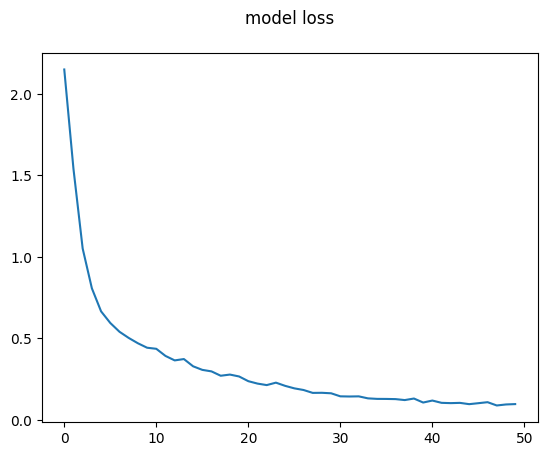

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


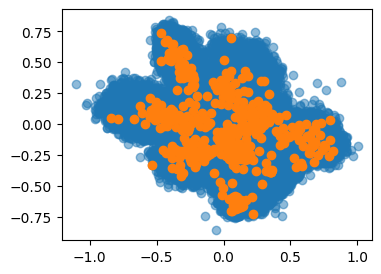

Initial Sigma:
 0.07165242731571198
Training process:

Epoch 1/50
450/450 - 6s - 13ms/step - loss: 3.7883
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `sparse_categorical_accuracy` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


450/450 - 0s - 1ms/step - loss: 3.7760
Epoch 3/50
450/450 - 0s - 1ms/step - loss: 3.7737
Epoch 4/50
450/450 - 0s - 1ms/step - loss: 3.7731
Epoch 5/50
450/450 - 0s - 1ms/step - loss: 3.7719
Epoch 6/50
450/450 - 0s - 1ms/step - loss: 3.7716
Epoch 7/50
450/450 - 1s - 1ms/step - loss: 3.7713
Epoch 8/50
450/450 - 1s - 1ms/step - loss: 3.7714
Epoch 9/50
450/450 - 1s - 1ms/step - loss: 3.7708
Epoch 10/50
450/450 - 0s - 1ms/step - loss: 3.7705
Epoch 11/50
450/450 - 0s - 1ms/step - loss: 3.7707
Epoch 12/50
450/450 - 0s - 1ms/step - loss: 3.7703
Epoch 13/50
450/450 - 1s - 1ms/step - loss: 3.7696
Epoch 14/50
450/450 - 0s - 1ms/step - loss: 3.7697
Epoch 15/50
450/450 - 0s - 1ms/step - loss: 3.7696
Epoch 16/50
450/450 - 0s - 1ms/step - loss: 3.7697
Epoch 17/50
450/450 - 0s - 1ms/step - loss: 3.7695
Epoch 18/50
450/450 - 0s - 1ms/step - loss: 3.7687
Epoch 19/50
450/450 - 0s - 1ms/step - loss: 3.7687
Epoch 20/50
450/450 - 0s - 1ms/step - loss: 3.7687
Epoch 21/50
450/450 - 0s - 1ms/step - loss: 3.7686

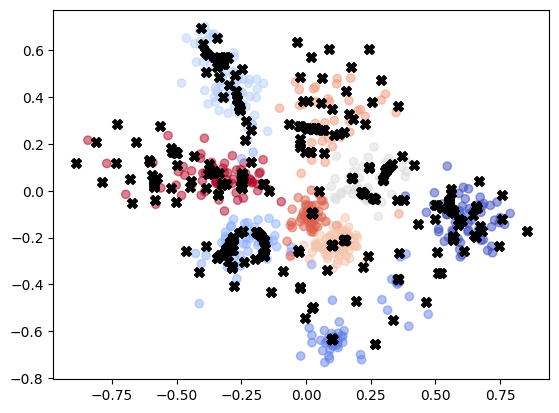

0

In [ ]:
encoder_model_mle_model(x_train, y_train, x_val, y_val, x_test, y_test, (64,64,1), 32, 2, 9000, 9, 500, 50, 500, False, 500)

### CNN Gray (64 x 64)

Finally, we implement our CNN model to the gray 64 x 64 images:

In [ ]:
print(f'Forma de train_images con canal: {x_train.shape}')
print(f'Forma de validation_images con canal: {x_val.shape}')
print(f'Forma de test_images con canal: {x_test.shape}')

Forma de train_images con canal: (89996, 64, 64, 1)
Forma de validation_images con canal: (10004, 64, 64, 1)
Forma de test_images con canal: (7180, 64, 64, 1)


Epoch 1/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5237 - loss: 1.2374 - val_accuracy: 0.7890 - val_loss: 0.5879
Epoch 2/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7967 - loss: 0.5531 - val_accuracy: 0.8325 - val_loss: 0.4575
Epoch 3/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8577 - loss: 0.3862 - val_accuracy: 0.8751 - val_loss: 0.3562
Epoch 4/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8916 - loss: 0.2980 - val_accuracy: 0.8655 - val_loss: 0.3783
Epoch 5/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9179 - loss: 0.2285 - val_accuracy: 0.8690 - val_loss: 0.3962
Epoch 6/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9414 - loss: 0.1645 - val_accuracy: 0.8774 - val_loss: 0.3847
Epoch 7/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9595 - loss: 0.1154 - val_accuracy: 0.8746 - val_loss: 0.4336
Epoch 8/50
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9699 - loss: 0.0881 -

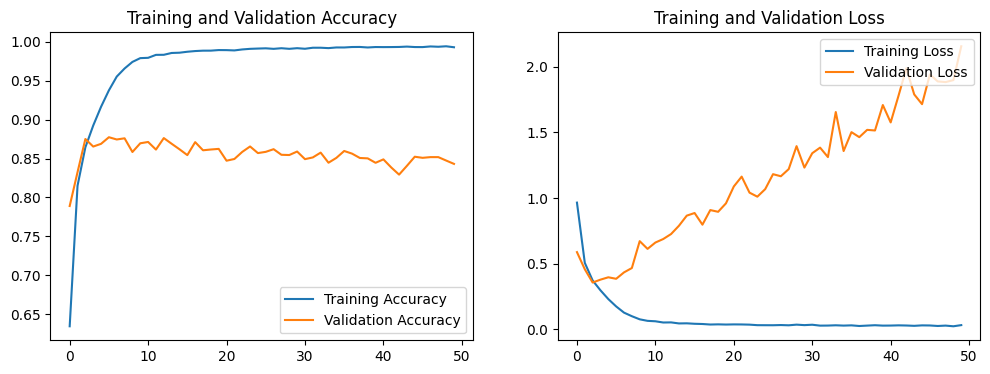

0

In [ ]:
cnn(x_train, y_train, x_val, y_val, x_test, y_test, (64, 64, 1))

# Conclutions

We exhibit our results in the following table corresponding to the test accuary of each model:

|          | Shallow KDM | Encoder KDM | MLE | CNN |
|----------|----------|----------|----------|----------|
| 28 x 28 | 0.554 | 0.829 | 0.827 | 0.771 |
| 28 x 28 gray | 0.437 | 0.741 | 0.728 | 0.750 |
| 64 x 64 | 0.579 | 0.845 | 0.849 | 0.876 |
| 64 x 64 gray | 0.446 | 0.740 | 0.746 | 0.801 |


As expected, among the KDM models, the best performance was achieved with the 64 x 64 RGB images using the MLE approach, with an accuracy of 0.849. This aligns with our hypothesis that higher resolution images would provide more information for the KDM models to leverage.


Interestingly, the KDM-based models, particularly the Encoder KDM and MLE approaches, outperformed the CNN on the 28 x 28 RGB dataset. This suggests that KDM models may have advantages in scenarios with limited data or lower resolution images.


The CNN models generally showed superior performance, especially on larger and grayscale images. However, the margin of difference is not overwhelming, particularly for the 28 x 28 RGB dataset where KDM models excelled.


It's worth noting that the Shallow KDM consistently underperformed compared to other approaches, indicating that more complex architectures are necessary to fully harness the potential of KDM in medical image analysis.


In conclusion, while CNN models still hold an edge in terms of overall accuracy, KDM models have demonstrated significant potential as an alternative approach for medical image classification. The Encoder KDM and MLE models, in particular, showed competitive performance, sometimes surpassing CNN accuracy.


The strengths of KDM models appear to lie in their ability to handle smaller, color images effectively. This could be particularly valuable in medical contexts where high-resolution images are not always available or where color information is crucial for diagnosis.


Furthermore, the interpretability of KDM models, adds another layer of value to their application in medical contexts. The ability to understand and explain model decisions is crucial in healthcare settings where transparency and accountability are paramount.


Moving forward, further research into optimizing KDM architectures for specific medical imaging applications could potentially close the performance gap with CNNs. Additionally, exploring hybrid approaches that combine the strengths of both KDM and CNN methodologies could yield promising results.


In summary, while CNNs remain a strong choice for medical image analysis, KDM-based approaches have proven to be a viable and promising alternative. Their competitive performance, combined with their interpretability, positions them as a valuable tool in the medical imaging toolkit, particularly in scenarios where explainability is as crucial as raw performance.